## **アヤメの分析**

「フィッシャーのアヤメ」という機械学習やデータ分析の世界で有名なデータセットを使い、基本的なデータの扱い方を学んでいきます。

[Iris setosa - Wikipedia](https://en.wikipedia.org/wiki/Iris_setosa)  
[Iris virgicolor - Wikipedia](https://en.wikipedia.org/wiki/Iris_versicolor)  
[Iris virginica - Wikipedia](https://en.wikipedia.org/wiki/Iris_virginica)


これはカナダのガスペ半島のある牧草地で同じ日に採取された以下の3種類のアヤメ、合計150本のデータです。

setosa、virgiclor、virginicaはここで 目的変数 や ラベル と呼ばれるものに当たります。


1本ごとにsepal_length（がく片の長さ）, sepal_width（がく片の幅）, petal_length（花弁の長さ）, petal_width（花弁の幅）の4種類の情報が記録されています。この4種類を 特徴量 と呼びます。

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from decimal import Decimal, ROUND_HALF_UP, ROUND_HALF_EVEN
import math
#np.set_printoptions(threshold=100) 

***

**【問題1】データの取得**  
以下のドキュメントを参考にしながら、irisデータセット読み込みましょう。  
scikit-learnという機械学習ライブラリにはirisデータセットが用意されているため、これを使用します。


[sklearn.datasets.load_iris — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)  

データが読み込めたら、説明変数をPandasのDataFrame型変数 <font color="red">X</font> に格納してください。列の名前も以下を参考にしてください。

[pandas.DataFrame — pandas 0.24.2 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)  

目的変数も同様に <font color="red">y</font> に格納してください。

In [2]:
from sklearn.datasets import load_iris
data_set = load_iris() #load_iris()の中身は辞書

#feature_value = {"sepal_length": data_set["data"][:, 0], \
#                         "sepal_width": data_set["data"][:, 1], \
#                         "petal_length": data_set["data"][:, 2], \
#                         "petal_width": data_set["data"][:, 3]}
#X = pd.DataFrame(feature_value)

X = pd.DataFrame(data_set.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
X #説明変数
#type(X)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [3]:
#species_num = {"Species": data_set["target"]}
#y = pd.DataFrame(data=species_num)

y = pd.DataFrame(data_set.target, columns=["Species"])
y #目的変数
#type(X)

,Species
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


***

**【問題2】データの結合**  
問題1で準備した<font color="red">X,y</font>を結合させたDataFrame型変数<font color="red">df</font>を作成してください。結合することで扱いやすくなります。  
これ以降はこの<font color="red">df</font>を使っていきます。

[Merge, join, and concatenate — pandas 0.24.2 documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)  
[pandas.concat — pandas 0.24.2 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)

In [4]:
df = pd.concat([X, y], axis=1)
df

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


***

**【問題3】データの確認**  
今回扱うデータがどのようなものなのかを確認します。以下の4つを行ってください。

- 先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）  
- ラベルごとのサンプル数の合計を出力する。  
- 特徴量に欠損値があるかを確認する。  
- 特徴量の平均値と標準偏差、四分位数を一度に表示させる。  

DataFrameのメソッドである.head(),.info(),.describe(),.isnull(),.sum()や、Seriesのメソッドである.value_countsなどを使ってみましょう。

[pandas.DataFrame.head — pandas 0.25.3 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) 最初のn行を返す  
[pandas.DataFrame.info — pandas 0.25.3 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) 簡単な要約を出力  
[pandas.DataFrame.describe — pandas 0.25.3 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) 記述統計を生成する  
[pandas.DataFrame.isnull — pandas 0.25.3 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html) 欠損値を検出する  
[pandas.DataFrame.sum — pandas 0.25.3 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html) 軸の値の合計を返す  
[pandas.Series.value_counts — pandas 0.25.3 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) 一意の値の数を含むシリーズを返す

In [5]:
#先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る（数値データか文字データかなど）

print(df.head()) #デフォルト＝5
print(df.info(verbose=True)) #verbose=False でより簡潔になる

   sepal_length  sepal_width  petal_length  petal_width  Species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
Species         150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB
None


In [6]:
#ラベルごとのサンプル数の合計を出力する

species = pd.Series(df["Species"])
print(species.value_counts())


2    50
1    50
0    50
Name: Species, dtype: int64


In [7]:
#特徴量に欠損値があるかを確認する

#df.isnull() #データフレーム内の全ての要素で確認
df.isnull().all(axis=0)#データフレーム内の全ての列で確認

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
Species         False
dtype: bool

In [8]:
#特徴量の平均値と標準偏差、四分位数を一度に表示させる

"""
count：要素の個数
mean：平均値
std：標準偏差
min：最小値
25%：1/4分位数
50%：中央値（median） 3/4分位数
75%：3/4分位数
max：最大値
"""
print(df.describe())

       sepal_length  sepal_width  petal_length  petal_width     Species
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.054000      3.758667     1.198667    1.000000
std        0.828066     0.433594      1.764420     0.763161    0.819232
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.600000     0.300000    0.000000
50%        5.800000     3.000000      4.350000     1.300000    1.000000
75%        6.400000     3.300000      5.100000     1.800000    2.000000
max        7.900000     4.400000      6.900000     2.500000    2.000000


***

**【問題4】irisデータセット自体の調査**  
ページのはじめで「カナダのガスペ半島のある牧草地で」と書きましたが、データセット自体についてもう少し調査しておきましょう。データセットを見る上で、そのデータセット自体について知っておくことも大切です。

>[フィッシャーのあやめ (Fisher’s Iris)](https://www.kde.cs.tut.ac.jp/2016/05/%E3%83%95%E3%82%A3%E3%83%83%E3%82%B7%E3%83%A3%E3%83%BC%E3%81%AE%E3%81%82%E3%82%84%E3%82%81-fishers-iris/#:~:text=%E3%83%87%E3%83%BC%E3%82%BF%E3%83%9E%E3%82%A4%E3%83%8B%E3%83%B3%E3%82%B0%E3%82%84%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92,%E3%83%95%E3%82%A3%E3%83%83%E3%82%B7%E3%83%A3%E3%83%BC%E3%81%AE%E3%81%82%E3%82%84%E3%82%81%E3%80%8D%E3%81%8C%E3%81%82%E3%82%8A%E3%81%BE%E3%81%99%E3%80%82&text=%E3%80%8C%E3%83%95%E3%82%A3%E3%83%83%E3%82%B7%E3%83%A3%E3%83%BC%E3%81%AE%E3%81%82%E3%82%84%E3%82%81%E3%80%8D%E3%81%AE%E3%81%BB%E3%81%86,%E3%81%97%E3%81%BE%E3%81%86%E3%81%AE%E3%81%AF%E9%A9%9A%E3%81%8D%E3%81%A7%E3%81%99%E3%80%82)  
[wikipedia(iris_flower_data_set)](https://en.wikipedia.org/wiki/Iris_flower_data_set)  
[Machine Learning Repository(Iris Data Set)](http://archive.ics.uci.edu/ml/datasets/Iris)

***

各特徴量や特徴量同士の関係を見ていきます。

**【問題5】必要なデータを抽出**  
DataFrameから必要なデータを抽出する方法を確認していきます。以下を行ってください。


- sepal_widthの列を３つの異なる方法で抽出する
- 50番目から99番目までのデータを抽出する
- petal_lengthの列の50番目から99番目までのデータを抽出する
- petal_widthの値が0.2のデータを抽出する

.locや.ilocを使うことになります。この２つはどう違うのかについて説明してください。

In [9]:
#sepal_widthの列を３つの異なる方法で抽出する

print(df["sepal_width"])
print("---------------------------------------------------------------------------")
print(df.sepal_width)
print("---------------------------------------------------------------------------")
print(df.loc[:, "sepal_width"])

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
5      3.9
6      3.4
7      3.4
8      2.9
9      3.1
10     3.7
11     3.4
12     3.0
13     3.0
14     4.0
15     4.4
16     3.9
17     3.5
18     3.8
19     3.8
20     3.4
21     3.7
22     3.6
23     3.3
24     3.4
25     3.0
26     3.4
27     3.5
28     3.4
29     3.2
      ... 
120    3.2
121    2.8
122    2.8
123    2.7
124    3.3
125    3.2
126    2.8
127    3.0
128    2.8
129    3.0
130    2.8
131    3.8
132    2.8
133    2.8
134    2.6
135    3.0
136    3.4
137    3.1
138    3.0
139    3.1
140    3.1
141    3.1
142    2.7
143    3.2
144    3.3
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64
---------------------------------------------------------------------------
0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
5      3.9
6      3.4
7      3.4
8      2.9
9      3.1
10     3.7
11     3.4
12     3.0
13     3.0
14     4.0
15     4.4
16     3.9
17     3.5
18     3

In [10]:
#50番目から99番目までのデータを抽出する

df.loc[50:99]

,sepal_length,sepal_width,petal_length,petal_width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


In [11]:
#petal_lengthの列の50番目から99番目までのデータを抽出する
df.loc[50:99, "petal_length"]

50    4.7
51    4.5
52    4.9
53    4.0
54    4.6
55    4.5
56    4.7
57    3.3
58    4.6
59    3.9
60    3.5
61    4.2
62    4.0
63    4.7
64    3.6
65    4.4
66    4.5
67    4.1
68    4.5
69    3.9
70    4.8
71    4.0
72    4.9
73    4.7
74    4.3
75    4.4
76    4.8
77    5.0
78    4.5
79    3.5
80    3.8
81    3.7
82    3.9
83    5.1
84    4.5
85    4.5
86    4.7
87    4.4
88    4.1
89    4.0
90    4.4
91    4.6
92    4.0
93    3.3
94    4.2
95    4.2
96    4.2
97    4.3
98    3.0
99    4.1
Name: petal_length, dtype: float64

In [12]:
#petal_widthの値が0.2のデータを抽出する

df[df["petal_width"].isin([0.2])]

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
14,5.8,4.0,1.2,0.2,0


＜.locと.ilocの違い＞  
.locは行と列をラベルで指定する。  
.ilocは行と列を番号で返す。（0から始まる）

***

**【問題6】図の作成**  
データは可視化して確認することが大切です。次の3つを行ってください。作図のライブラリはMatplotlibの他seabornもよく使われます。


- ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）
- 特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する
- 特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する

箱ひげ図とバイオリン図は似た図を表示します。これらはどう違い、それぞれどのような利点があるのかについて説明してください。  

[matplotlib.pyplot.boxplot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html)  
[pandas.DataFrame.boxplot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html)  
[seaborn.violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html)

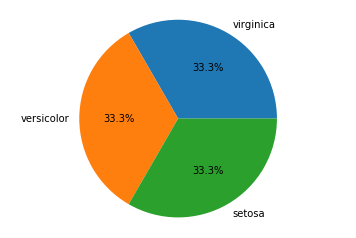

In [13]:
#ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）

plt.pie(species.value_counts(), labels=['virginica', 'versicolor', 'setosa'], autopct="%1.1f%%")
plt.axis('equal') #真円に

plt.show()

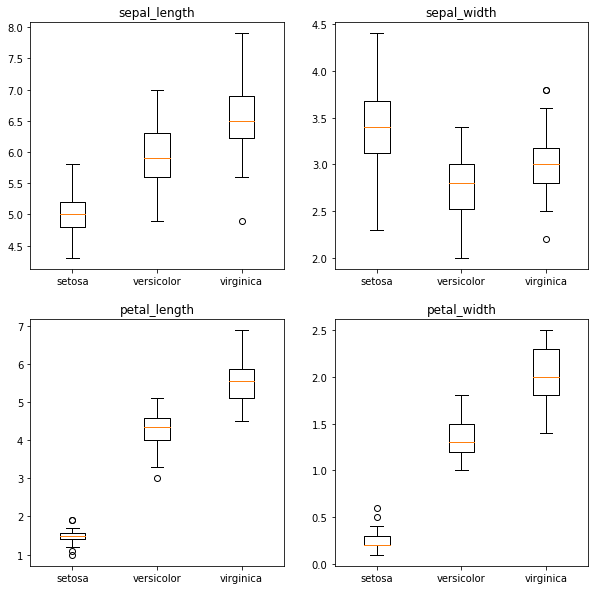

In [14]:
#特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する
#冗長版

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

df_setosa = df[df["Species"].isin([0])]
df_versicolor = df[df["Species"].isin([1])]
df_virginica = df[df["Species"].isin([2])]

ax1.set_title("sepal_length")
ax2.set_title("sepal_width")
ax3.set_title("petal_length")
ax4.set_title("petal_width")
ax1.boxplot([df_setosa["sepal_length"], df_versicolor["sepal_length"], df_virginica["sepal_length"]], labels=['setosa', 'versicolor', 'virginica'])
ax2.boxplot([df_setosa["sepal_width"], df_versicolor["sepal_width"], df_virginica["sepal_width"]], labels=['setosa', 'versicolor', 'virginica'])
ax3.boxplot([df_setosa["petal_length"], df_versicolor["petal_length"], df_virginica["petal_length"]], labels=['setosa', 'versicolor', 'virginica'])
ax4.boxplot([df_setosa["petal_width"], df_versicolor["petal_width"], df_virginica["petal_width"]], labels=['setosa', 'versicolor', 'virginica'])

plt.show()

Speciesについて、「0＝setosa」「1＝versicolor」「2＝virginica」


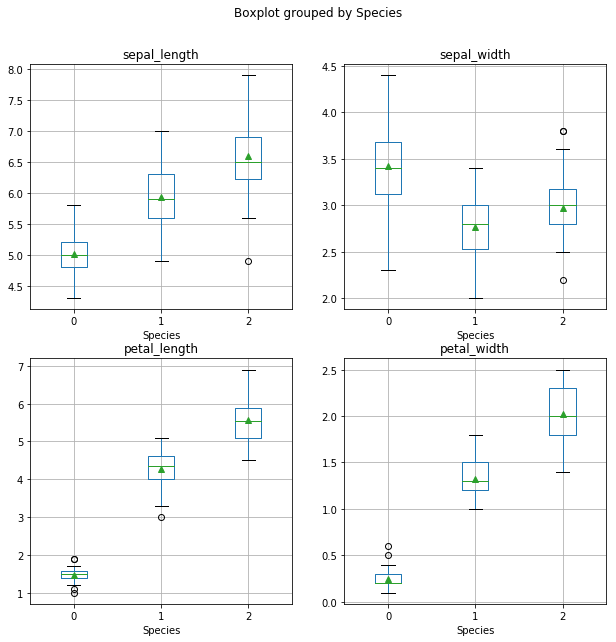

In [15]:
#特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する
#改良版（プログラムを簡潔に。平均も表示。）

print("Speciesについて、「0＝setosa」「1＝versicolor」「2＝virginica」")
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

df.boxplot(ax=ax1, column=["sepal_length"], by="Species", showmeans=True)
df.boxplot(ax=ax2, column=["sepal_width"], by="Species", showmeans=True)
df.boxplot(ax=ax3, column=["petal_length"], by="Species", showmeans=True)
df.boxplot(ax=ax4, column=["petal_width"], by="Species", showmeans=True)
plt.show()

seabornのオンラインリポジトリにもアヤメのデータセットがあったのでそれを使用する。


/Users/itonaoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


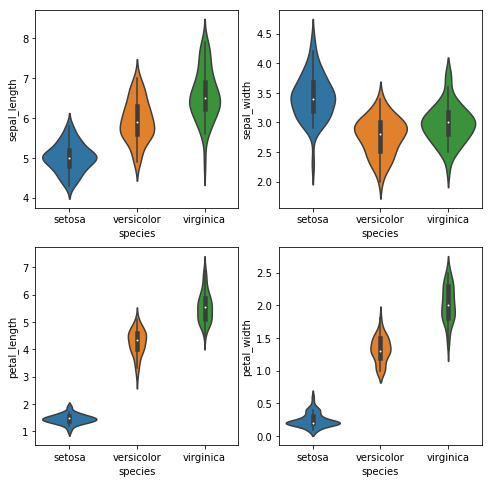

In [16]:
#特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する

print("seabornのオンラインリポジトリにもアヤメのデータセットがあったのでそれを使用する。")
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

iris = sns.load_dataset("iris")
sns.violinplot(ax=ax1, x=iris["species"], y=iris["sepal_length"])
sns.violinplot(ax=ax2, x=iris["species"], y=iris["sepal_width"])
sns.violinplot(ax=ax3, x=iris["species"], y=iris["petal_length"])
sns.violinplot(ax=ax4, x=iris["species"], y=iris["petal_width"])
plt.show()

>[seaborn.distplot()を使ったらFutureWarningを吐かれた話](http://ooutimatuki.hatenablog.com/entry/2019/04/05/221325)

＜箱ひげ図とバイオリン図の違い＞  
数値データの頻度の分布を可視化できるかできないか  

＜箱ひげ図のメリット＞  
- データの要約統計量（最小値、最大値、中央値、平均値、四分位範囲）や外れ値を視覚化できる
- 複数の母集団データを同時に扱える
- 中央値を用いることで、実質的なデータの真ん中を表現できる（平均だと外れ値を含む）

＜バイオリン図のメリット＞  
- データの要約統計量（最小値、最大値、中央値、平均値、四分位範囲）を視覚化できる
- 複数の母集団データを同時に扱える
- 数値データの頻度の分布を可視化できる
- 中央値を用いることで、実質的なデータの真ん中を表現できる（平均だと外れ値を含む）

***

**【問題7】特徴量間の関係の確認**   
特徴量間の関係を見ていきます。次の4つを行ってください。


- 縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る
- 全ての組み合わせの散布図を一度に表示させる、散布図行列を作る
- ４つの特徴量に関する相関係数行列を作る
- 相関係数行列のヒートマップを作る

相関係数行列はDataFrameのcorr()メソッドを使うことで求められます。  
[pandas.DataFrame.corr — pandas 0.24.2 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)  
[seaborn.scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html?highlight=scatterplot#seaborn.scatterplot)

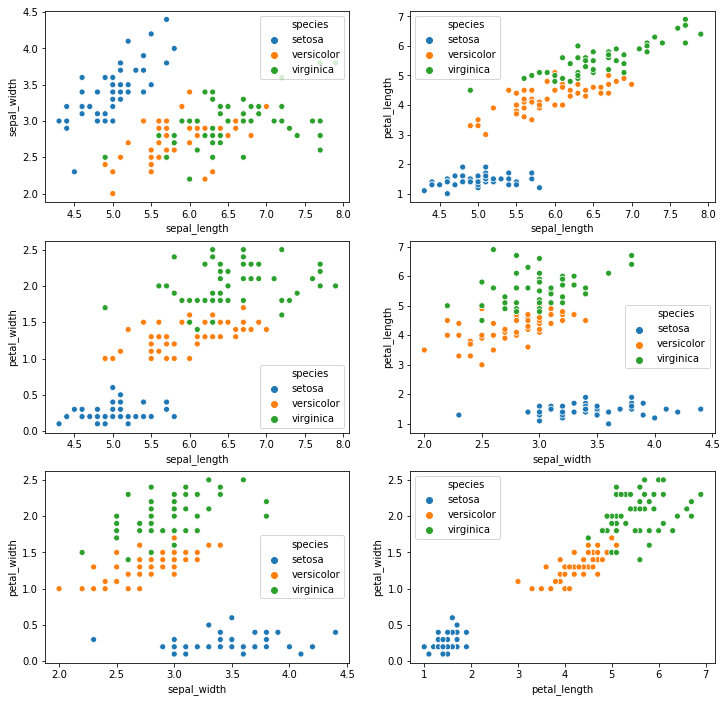

In [17]:
#縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る

fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(3, 2, 1)
ax2 = fig.add_subplot(3, 2, 2)
ax3 = fig.add_subplot(3, 2, 3)
ax4 = fig.add_subplot(3, 2, 4)
ax5 = fig.add_subplot(3, 2, 5)
ax6 = fig.add_subplot(3, 2, 6)

sns.scatterplot(ax=ax1, x="sepal_length", y="sepal_width", hue="species", data=iris)
sns.scatterplot(ax=ax2, x="sepal_length", y="petal_length", hue="species", data=iris)
sns.scatterplot(ax=ax3, x="sepal_length", y="petal_width", hue="species", data=iris)
sns.scatterplot(ax=ax4, x="sepal_width", y="petal_length", hue="species", data=iris)
sns.scatterplot(ax=ax5, x="sepal_width", y="petal_width", hue="species", data=iris)
sns.scatterplot(ax=ax6, x="petal_length", y="petal_width", hue="species", data=iris)
plt.show()

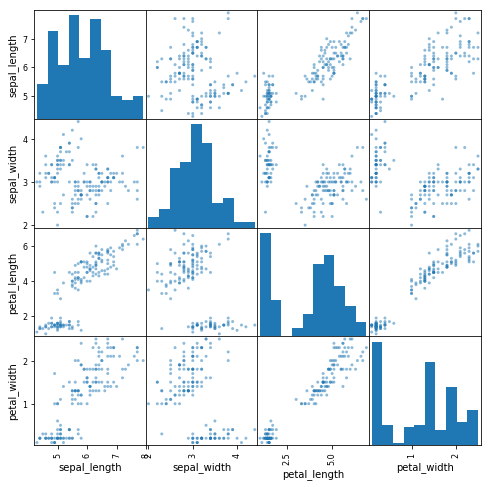

In [18]:
#全ての組み合わせの散布図を一度に表示させる、散布図行列を作る

pd.plotting.scatter_matrix(X, figsize=(8, 8))
#sns.pairplot(iris)
plt.show()

In [19]:
#４つの特徴量に関する相関係数行列を作る

X.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


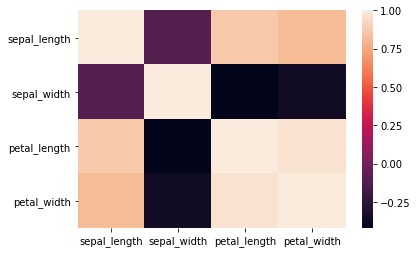

In [20]:
#相関係数行列のヒートマップを作る

sns.heatmap(X.corr())
plt.show()

***

**【問題8】可視化したグラフや表の結果の説明**  
データを探索した時には、結果を述べる（+考察する）ことが大切です。ここまでで作成した表や図から読み取れることや気づきを説明してください。


例えば、散布図行列を見ながら、3種類のアヤメにはどのような違いがあるかを説明してください。

＜結果と考察＞  
問題6で作成したバイオリン図より、
- 全種類のアヤメにおいて、各特徴量の度数分布は中央値基準で左右対称である
- setonaのpetal_length及びpetal_widthについては、取る値の範囲が狭くデータが密集している
- versicolorとvirginicaは取る値の範囲や中央値が似ているため、判別に注意が必要
- setonaは他の2種と比べると特徴的なため、判別は容易  


問題7で作成した散布図及び散布図行列より、
- 「petal_lengthとpetal_width」「sepal_lengthとpetal_width」「sepal_lengthとpetal_length」には強い相関関係があるとわかる（相関係数行列を見ても明らかである）